## House Price Predition in Boston

House Price Predition in Boston, project doen by following machine learning course at Udemy

In [1]:
# Imports section
from sklearn.datasets import load_boston # load data
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm


# $1.$ Gather Data

In [2]:

dataset = load_boston()

data = pd.DataFrame(data = dataset.data, columns= dataset.feature_names) 
# add PRICE column to data 
data['PRICE']= dataset.target
data

C:\Users\gagni\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


# $2.$ Clean and Explore Data

In [3]:
# check missing values
data.info()  # looks all fine
print(dataset.DESCR)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB
.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually t

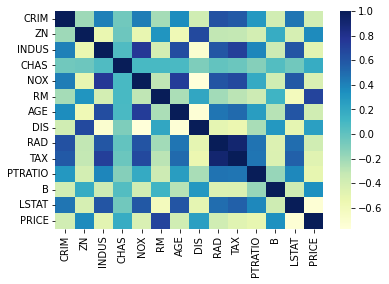

CRIM      -0.388305
ZN         0.360445
INDUS     -0.483725
CHAS       0.175260
NOX       -0.427321
RM         0.695360
AGE       -0.376955
DIS        0.249929
RAD       -0.381626
TAX       -0.468536
PTRATIO   -0.507787
B          0.333461
LSTAT     -0.737663
PRICE      1.000000
Name: PRICE, dtype: float64

In [4]:
# correlation of features
sns.heatmap(data.corr(), cmap='YlGnBu')
plt.show()

data.corr().PRICE

CHAS is dummy var, for this corr() method doesnot work.
for all other feature, corr with price seems relevant

# $3.$ Model - Multivariable Regression

$$\hat y = \theta _0 *RM + \theta _1 *NOX +... +\theta _{13} *LSTAT$$

In [5]:
# split dataset into train and test with 80/20 ratio

# prepare data
prices = data['PRICE']
features = data.drop('PRICE', axis=1)  # remove PRICE from dataset, leave only features

X_train, X_test, y_train, y_test = train_test_split(features, prices, test_size = 0.2)

In [6]:
# Linear regression
regr = LinearRegression()
regr.fit(X_train,y_train)
regr.coef_  #  theta 1, theta 2... theta12
regr.intercept_  # theta 0
pd.DataFrame(data=regr.coef_, index = X_train.columns, columns=['coef'])

,coef
CRIM,-0.119340
ZN,0.047814
INDUS,-0.023236
CHAS,3.554725
NOX,-14.277533
RM,3.760250
AGE,0.006877
DIS,-1.402591
RAD,0.258490
TAX,-0.010926


# $4.$ Evaluate Model & Model Correction

In [7]:
regr.score(X_train,y_train) # = 0.7643
data['PRICE'].skew()   # 1.1081 small positive skewness

1.1080984082549072

### Transform Data:  linear $\rightarrow$ log

In [8]:
price_log = np.log(data['PRICE'])
price_log.skew()  # -0.33; skewness decreases after data transformation

-0.33032129530987864

In [9]:
# new model with Log prices

X_train, X_test, y_train, y_test = train_test_split(features, price_log, test_size = 0.2)

# Linear regression
regr = LinearRegression()
regr.fit(X_train,y_train)
regr.coef_  #  theta 1, theta 2... theta12
regr.intercept_  # theta 0
pd.DataFrame(data=regr.coef_, index = X_train.columns, columns=['coef'])

,coef
CRIM,-0.011454
ZN,0.001179
INDUS,0.001873
CHAS,0.097527
NOX,-0.617557
RM,0.091942
AGE,-0.000197
DIS,-0.047785
RAD,0.013749
TAX,-0.000617


In [10]:
regr.score(X_train,y_train) # = 0.8089; higher than 'Normal price model' -  0.7643

0.7898086384299094

In [11]:
# p-values
x_const = sm.add_constant(X_train) # add columns of '1'-s.. need for OLS model
model = sm.OLS(y_train,x_const)
results = model.fit()

pd.DataFrame({'coef': round(results.params,3),'p-values': round(results.pvalues,3)})


,coef,p-values
const,4.033,0.000
CRIM,-0.011,0.000
ZN,0.001,0.070
INDUS,0.002,0.502
CHAS,0.098,0.012
NOX,-0.618,0.000
RM,0.092,0.000
AGE,-0.000,0.743
DIS,-0.048,0.000
RAD,0.014,0.000



P-values for INDUS and AGE are high ==> they are less significant


# Model without INDUS and AGE
features = data.drop(['INDUS','AGE'], axis=1)  # remove INDUS and AGE from dataset, leave only features

X_train, X_test, y_train, y_test = train_test_split(features, price_log, test_size = 0.2)

# Linear regression
regr = LinearRegression()
regr.fit(X_train,y_train)
regr.coef_  #  theta 1, theta 2... theta12
regr.intercept_  # theta 0
pd.DataFrame(data=regr.coef_, index = X_train.columns, columns=['coef'])

regr.score(X_train,y_train) # = 0.9575; higher than 'Log price model' -  0.8089

'''

### Check for Multicollinearity

In [12]:
len(x_const.columns) # number of columns in data

14

In [13]:
vif = []  # empty 
for i in range(len(x_const.columns)):
    vif.append(variance_inflation_factor(exog=x_const.values, exog_idx=i))
    

pd.DataFrame({'coef_name': x_const.columns, 'vif': np.round(vif,2)})

,coef_name,vif
0,const,582.43
1,CRIM,2.01
2,ZN,2.48
3,INDUS,4.20
4,CHAS,1.07
5,NOX,4.29
6,RM,1.96
7,AGE,3.14
8,DIS,4.18
9,RAD,7.34


## Feature Selection

In [14]:
# Baysian Information Criterion
print('Bic value of Original Log models is: ', results.bic)
print('R-square  of Original Log models is: ', results.rsquared)

Bic value of Original Log models is:  -121.8272641047164
R-square  of Original Log models is:  0.7898086384299096


In [15]:
# Model withouth INDUS 
x_const_woINDUS = x_const.drop('INDUS', axis=1)
model_woINDUS = sm.OLS(y_train,x_const_woINDUS)
results_woINDUS = model_woINDUS.fit()

pd.DataFrame({'coef': round(results_woINDUS.params,3),'p-values': round(results_woINDUS.pvalues,3)})

,coef,p-values
const,4.027,0.000
CRIM,-0.012,0.000
ZN,0.001,0.078
CHAS,0.100,0.010
NOX,-0.590,0.000
RM,0.090,0.000
AGE,-0.000,0.767
DIS,-0.049,0.000
RAD,0.013,0.000
TAX,-0.001,0.000


In [16]:
# Model withouth INDUS 

# Baysian Information Criterion
print(f'Bic value of Original log model was: {results.bic}, and woINDUS Log models is: ', results_woINDUS.bic)
print(f'R-square  of Original log model was: {results.rsquared},and woINDUS Log models is: ', results_woINDUS.rsquared)

Bic value of Original log model was: -121.8272641047164, and woINDUS Log models is:  -127.36158715503875
R-square  of Original log model was: 0.7898086384299096,and woINDUS Log models is:  0.7895654813887703


BIC walue is lower for woINDUS model, while R-square stays almost same $\rightarrow$ we can use woINDUS model

In [17]:
# Model withouth INDUS and AGE

x_const_woINDUS_AGE = x_const.drop(['INDUS','AGE'], axis=1)
model_woINDUS_AGE = sm.OLS(y_train,x_const_woINDUS_AGE)
results_woINDUS_AGE = model_woINDUS_AGE.fit()

pd.DataFrame({'coef': round(results_woINDUS_AGE.params,3),'p-values': round(results_woINDUS_AGE.pvalues,3)})

,coef,p-values
const,4.032,0.000
CRIM,-0.012,0.000
ZN,0.001,0.068
CHAS,0.099,0.010
NOX,-0.604,0.000
RM,0.089,0.000
DIS,-0.048,0.000
RAD,0.013,0.000
TAX,-0.001,0.000
PTRATIO,-0.036,0.000


In [18]:
# Model withouth INDUS 

# Baysian Information Criterion
print(f'Bic value of woINDUS log model was: {results_woINDUS.bic}, and woINDUS_AGE Log models is: ', results_woINDUS_AGE.bic)
print(f'R-square  of woINDUS log model was: {results_woINDUS.rsquared},and woINDUS_AGE Log models is: ', results_woINDUS_AGE.rsquared)

Bic value of woINDUS log model was: -127.36158715503875, and woINDUS_AGE Log models is:  -133.27239986668198
R-square  of woINDUS log model was: 0.7895654813887703,and woINDUS_AGE Log models is:  0.7895182834647816


BIC walue is lower for woINDUS_AGE log model, while R-square stays almost same $\rightarrow$ we can use woINDUS_AGE model

# Conclusion

#### INDUS and AGE parameters are less relevant. 
#### I use Linear Regression Model to predict house prices withour these 2 parameters


In [23]:
import boston_house_price_prediction as pred
pred.get_dollar_estimate(8,15,False)

The estimated property value is 755000.0.
At 95% confidence the valuation range is
USD 519000.0 at the lower end to USD 1099000.0 at the high end.


C:\Users\gagni\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
